In [2]:
%matplotlib inline
from scipy.optimize import minimize
import numpy as np
import traml

In [3]:
def fun(x, stack, layers, c, delta, TR):
    for i in layers:
          
        
        stack.d(i, x[i-1])
    #stack.d(1,x[0])
    #stack.d(2,x[1])
    for p in x:
        p = np.sqrt(x[0]**2)
    x[0]=np.sqrt(x[0]**2)
    min = 1-stack.average(TR, c, delta)
    #min = stack.average(TR, c, delta)
    #print min

    return min**10

In [4]:
def minTR(stack, film_range, c, delta, TR='R'):
    print film_range
    x = []
    layers = []
    bnds = []
    for i in range(film_range[0],film_range[1]+1):
        #print i
        x.append(stack.config[i][1])
        layers.append(i)
        bnds.append((2,1000))
        
    result = minimize(fun, x, args=(stack, layers, c,delta, TR), bounds = bnds,tol=1e-30, method='SLSQP')
    
    #stack.plot()
    print layers
    return result

In [5]:
c = traml.Stack()

peak = 0.45
delta = 0.05
mat2 = 105401 #MgF2
mat1 = 111407 #SiO2
#mat2 = 114701 #ZnS
#mat2 = 112003 #ZnO
#mat2 = 110902 #MgO
#mat1 = 110104 #Al2O3

R = []
n = []
it = []


for i in range(0, 40):
    if i % 2 == 0:
        print 'even', i
        c.add(mat1,100)
    else:
        c.add(mat2,100)
        
    
    
    result = minTR(c, [1,len(c.config)-1], peak, delta, TR='R')
    R.append(c.average('R',peak,delta))
    n.append(i+1)
    it.append(result.nit)
   
    #c.table()
    print '============================================================================================'
    print c.average('R',peak,delta)
    print '============================================================================================'

|   # |   Material | Thickness (nm)   | Type      |
|-----+------------+------------------+-----------|
|   0 |     301005 | --               | substrate |
even 0
|   # |   Material | Thickness (nm)   | Type      |
|-----+------------+------------------+-----------|
|   0 |     301005 | --               | substrate |
|   1 |     111407 | 100              | passive   |
[1, 1]
[1]
0.0842262874269
|   # |   Material | Thickness (nm)   | Type      |
|-----+------------+------------------+-----------|
|   0 |     301005 | --               | substrate |
|   1 |     111407 | 149.114091002    | passive   |
|   2 |     105401 | 100              | passive   |
[1, 2]
[1, 2]
0.107821933158
even 2
|   # |   Material | Thickness (nm)   | Type      |
|-----+------------+------------------+-----------|
|   0 |     301005 | --               | substrate |
|   1 |     111407 | 223.655185297    | passive   |
|   2 |     105401 | 80.2301826518    | passive   |
|   3 |     111407 | 100              | passiv

In [6]:
import matplotlib.pyplot as plt
c.set_range([0.25, 1])

In [ ]:
R

In [8]:
import matplotlib as mpl
label_size = 15
mpl.rcParams['xtick.labelsize'] = label_size 
mpl.rcParams['ytick.labelsize'] = label_size 

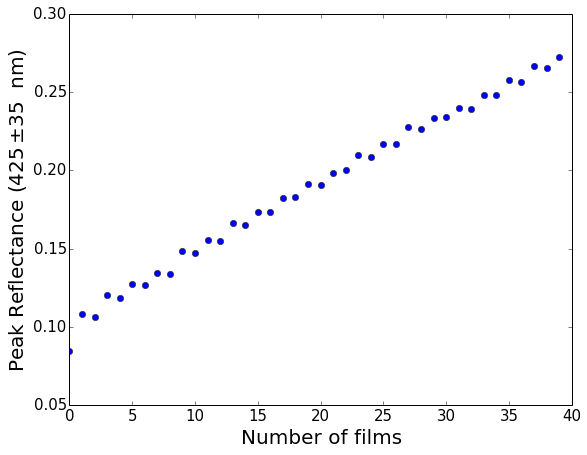

In [14]:
fig = plt.figure(figsize=(9,7))
ax = fig.add_subplot(111)

ax.plot(R, 'o')
ax.set_xlim([0,40])
ax.set_xlabel(r'Number of films', fontsize=20)
ax.set_ylabel(r'Peak Reflectance ($425\pm35$  nm)', fontsize=20)


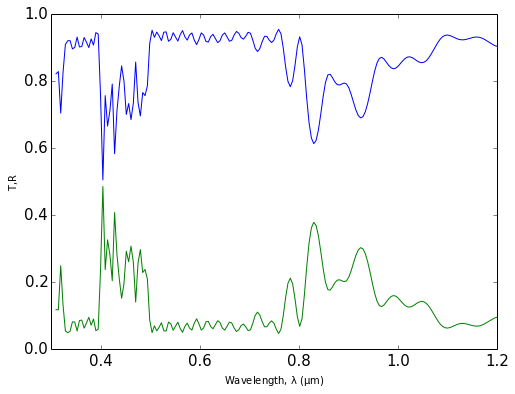

In [15]:
c.set_range([0.3,1.2])
c.plot()

In [11]:
c.table()

|   # |   Material | Thickness (nm)   | Type      |
|-----+------------+------------------+-----------|
|   0 |     301005 | --               | substrate |
|   1 |     111407 | 227.521897229    | passive   |
|   2 |     105401 | 83.0116936738    | passive   |
|   3 |     111407 | 243.450353664    | passive   |
|   4 |     105401 | 91.9450734035    | passive   |
|   5 |     111407 | 244.459151683    | passive   |
|   6 |     105401 | 84.5314219779    | passive   |
|   7 |     111407 | 237.567254325    | passive   |
|   8 |     105401 | 88.5317780889    | passive   |
|   9 |     111407 | 242.339983269    | passive   |
|  10 |     105401 | 85.3741012457    | passive   |
|  11 |     111407 | 224.30139983     | passive   |
|  12 |     105401 | 77.4997580464    | passive   |
|  13 |     111407 | 210.122619376    | passive   |
|  14 |     105401 | 72.7400628836    | passive   |
|  15 |     111407 | 214.635813035    | passive   |
|  16 |     105401 | 79.414409228     | passive   |
|  17 |     

In [12]:
c.remove()

In [13]:
d.plot()

NameError: name 'd' is not defined

In [ ]:
print d.average('R',0.5, 0.02)